# Importing Data Processing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Importing Plotting Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the data and doing Feature Engineering using Pandas

In [3]:
df = pd.read_csv('train_s3TEQDk.csv')
dftest = pd.read_csv('test_mSzZ8RL.csv')

In [4]:
df.head() # to take a quick look dataframe

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
df.dtypes # checking dtypes of the dataframe

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [6]:
df.shape # checking shape of the dataframe

(245725, 11)

In [7]:
df.isnull().sum() # checking null values in the dataframe

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
df.nunique() # checking unique values in the dataframe

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

### Function to impute most occurred category and add importance variable for Credit Product feature

In [4]:
#1. Function to replace NAN values with mode value
def impute_nan_add_variable(DataFrame,ColName):
    # add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] = np.where(DataFrame[ColName].isnull(),1,0)
    #Take most occurred category
    Mode_Cat = DataFrame[ColName].mode()[0]
    #Replace NAN values with most occurred category
    DataFrame[ColName].fillna(Mode_Cat,inplace=True)

#Call function to impute and add var
for Columns in ['Credit_Product']:
       impute_nan_add_variable(df,Columns)
        
for Columns in ['Credit_Product']:
       impute_nan_add_variable(dftest,Columns)


#Display Top 10 Rows to see Result
df[['Credit_Product','Credit_Product_Imputed']].head(10)

,Credit_Product,Credit_Product_Imputed
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0
5,No,0
6,No,1
7,No,0
8,No,0
9,Yes,0


In [10]:
df.shape # checking numbers of column for making Correlation Matrix

(245725, 12)

# Visualizing Correlation Matrix of all features

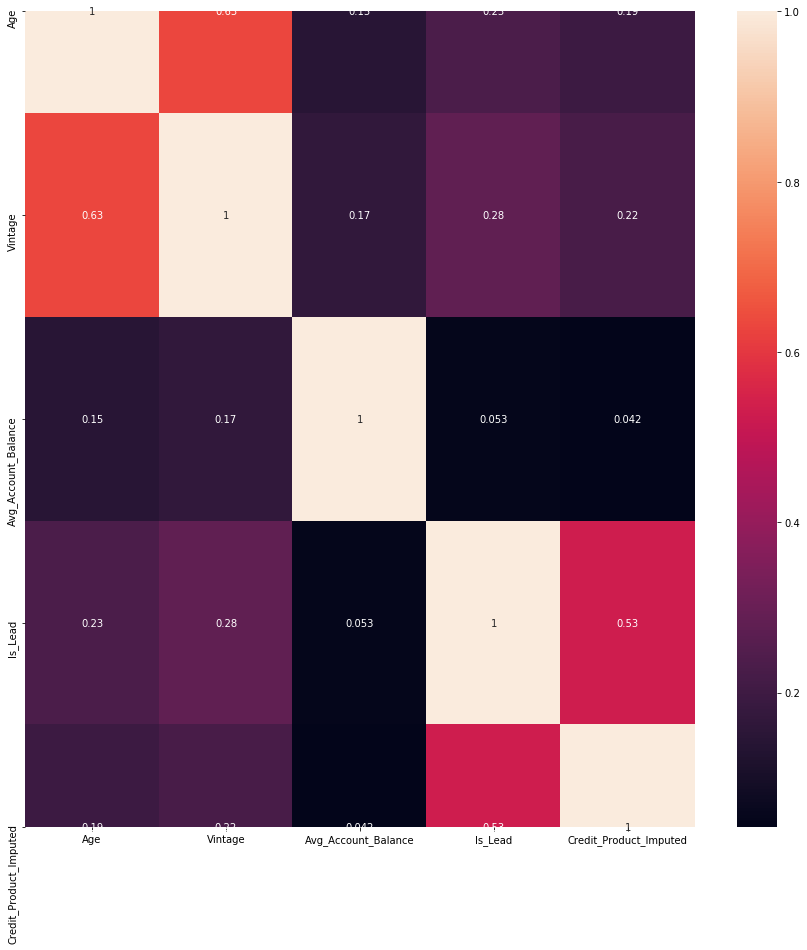

In [11]:
cols = list(range(12))  # list of all features
fig, ax = plt.subplots(figsize=(15,15)) # defining the size and shape of the plot
corelation = df.iloc[:,cols].corr() 
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)
plt.savefig('Correlation matrix range all.png') # saving the plot

In [12]:
##We can see that there is a strong positive relationship between (Vintage,Age) and (Credit_product_imputed,is_lead)
##Hence Dropping Age seems logical thing to do (edit: tested with Age too, without age giving better results)

In [13]:
df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

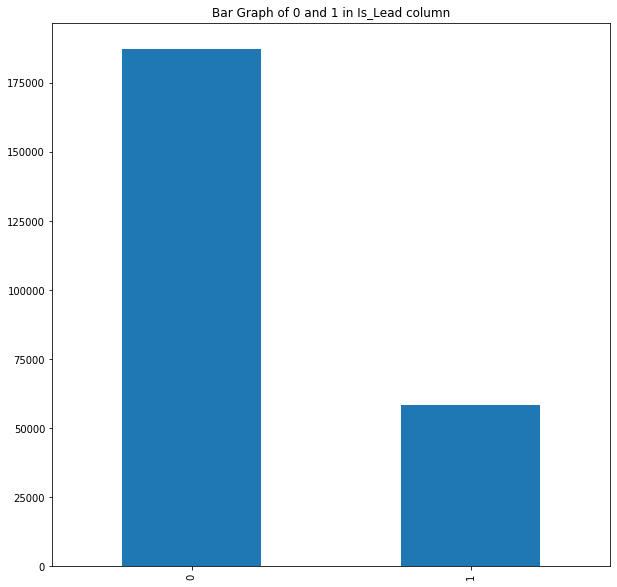

In [14]:
df.Is_Lead.value_counts().plot(kind='bar', figsize = (10,10), title = 'Bar Graph of 0 and 1 in Is_Lead column')
plt.xlabel = ('CC interested status')
plt.ylabel = ('No. of Leads')

In [15]:
#Now we clearly see that this data is imbalanced

## Splitting the Features and Target Variables

In [5]:
#Encoding Input Categorical values to Ordinal or Integer
Gender_dict = {'Female':1, 'Male':2}
df['Gender_Ordinal'] = df.Gender.map(Gender_dict)
df = df.drop(['Gender'],axis=1)

Credit_Product_dict = {'No':3,'Yes':4}
df['Credit_Product_Ordinal'] = df.Credit_Product.map(Credit_Product_dict)
df = df.drop(['Credit_Product'],axis=1)

Is_Active_dict = {'No':3,'Yes':4}
df['Is_Active_Ordinal'] = df.Is_Active.map(Is_Active_dict)
df = df.drop(['Is_Active'],axis=1)

Occupation_dict = {'Entrepreneur':5,'Salaried':6,'Self_Employed':7,'Other':8}
df['Occupation_Ordinal'] = df.Occupation.map(Occupation_dict)
df = df.drop(['Occupation'],axis=1)

df['Channel_Code'] = df['Channel_Code'].str.replace(r'X', '')
df['Channel_Code'] = df['Channel_Code'].astype(str).astype(int)
df['Region_Code'] = df['Region_Code'].str.replace(r'RG', '')
df['Region_Code'] = df['Region_Code'].astype(str).astype(int)

In [6]:
#Encoding Test Data Set Similar as Above
Gender_dict = {'Female':1, 'Male':2}
dftest['Gender_Ordinal'] = dftest.Gender.map(Gender_dict)
dftest = dftest.drop(['Gender'],axis=1)

Credit_Product_dict = {'No':3,'Yes':4}
dftest['Credit_Product_Ordinal'] = dftest.Credit_Product.map(Credit_Product_dict)
dftest = dftest.drop(['Credit_Product'],axis=1)

Is_Active_dict = {'No':3,'Yes':4}
dftest['Is_Active_Ordinal'] = dftest.Is_Active.map(Is_Active_dict)
dftest = dftest.drop(['Is_Active'],axis=1)

Occupation_dict = {'Entrepreneur':5,'Salaried':6,'Self_Employed':7,'Other':8}
dftest['Occupation_Ordinal'] = dftest.Occupation.map(Occupation_dict)
dftest = dftest.drop(['Occupation'],axis=1)

dftest['Channel_Code'] = dftest['Channel_Code'].str.replace(r'X', '')
dftest['Channel_Code'] = dftest['Channel_Code'].astype(str).astype(int)
dftest['Region_Code'] = dftest['Region_Code'].str.replace(r'RG', '')
dftest['Region_Code'] = dftest['Region_Code'].astype(str).astype(int)

In [18]:
df.dtypes #To check dtypes all being converted to Integers

ID                        object
Age                        int64
Region_Code                int32
Channel_Code               int32
Vintage                    int64
Avg_Account_Balance        int64
Is_Lead                    int64
Credit_Product_Imputed     int32
Gender_Ordinal             int64
Credit_Product_Ordinal     int64
Is_Active_Ordinal          int64
Occupation_Ordinal         int64
dtype: object

In [8]:
#Removing ID 
df = df.drop(['ID'],axis=1)

X = df.iloc[:, df.columns != 'Is_Lead'].values # Selecting All columns except Is_Lead column 
y = df.iloc[:, df.columns == 'Is_Lead'].values # Selecting Only Is_Lead column

from sklearn.preprocessing import LabelEncoder

# encode string output values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)


#X_resampled, y_resampled = SMOTE().fit_sample(X, y)

C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
X.shape

(245725, 10)

In [21]:
y.shape

(245725, 1)

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 38)

In [21]:
X_train = np.asmatrix(X_train) #Converting to np.ndarray to fix a bug
X_train.shape # shape of X_train

(196580, 10)

In [22]:
X_test = np.asmatrix(X_test) #Converting to np.ndarray to fix a bug
X_test.shape # shape of X_test

(49145, 10)

In [23]:
#y_train = np.asmatrix(y_train)
y_train.shape # shape of y_train

(196580,)

In [24]:
y_test.shape

(49145,)

# Default Xgboost Classifier Model

In [11]:
# for tracking time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [28]:
# Xgboost model
from xgboost import XGBClassifier
classifier = XGBClassifier()

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
classifier.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 12.4 seconds.


## X_test prediction on default hyperparameters

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36106  1410]
 [ 5439  6190]]


0.8606368908332486

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37516
           1       0.81      0.53      0.64     11629

    accuracy                           0.86     49145
   macro avg       0.84      0.75      0.78     49145
weighted avg       0.86      0.86      0.85     49145



## X set Prediction on default hyperparameters

In [31]:
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[180247   7190]
 [ 27123  31165]]


0.8603601587140096

In [32]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91    187437
           1       0.81      0.53      0.64     58288

    accuracy                           0.86    245725
   macro avg       0.84      0.75      0.78    245725
weighted avg       0.86      0.86      0.85    245725



## HyperParameters tuning with Gridsearch CV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params={
 "learning_rate"    : [0.05,0.1, 0.3,0.35] ,
 "max_depth"        : [ 12, 15]   
}

In [35]:
grid_search= GridSearchCV(estimator = classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5)

In [36]:
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 8 minutes and 51.92 seconds.


In [37]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [38]:
accuracy = grid_search.best_score_
accuracy

0.6526072665904078

In [39]:
#grid_tuned_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)

#Tuned Further
grid_tuned_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [40]:
grid_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = grid_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[35535  1981]
 [ 5083  6546]]
Accuracy on X_test set  0.8562620815952793


In [41]:
print('Classification report on X_test set\n',classification_report(y_test,y_pred))

Classification report on X_test set
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     37516
           1       0.77      0.56      0.65     11629

    accuracy                           0.86     49145
   macro avg       0.82      0.76      0.78     49145
weighted avg       0.85      0.86      0.85     49145



In [42]:
y_pred = grid_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set ',accuracy_score(y, y_pred))

[[181584   5853]
 [ 19969  38319]]
Accuracy on whole X set  0.8949150473089836


In [43]:
print('Classification report on whole X set\n',classification_report(y,y_pred))

Classification report on whole X set
               precision    recall  f1-score   support

           0       0.90      0.97      0.93    187437
           1       0.87      0.66      0.75     58288

    accuracy                           0.89    245725
   macro avg       0.88      0.81      0.84    245725
weighted avg       0.89      0.89      0.89    245725



## Hyperparameter Tuning with RandomizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
params={
 "learning_rate"    : [0.05, 0.1, 0.2, 0.3, 1 ] ,
 "max_depth"        : [10, 12, 15],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.15, 0.3]
    
}

In [70]:
random_search= RandomizedSearchCV(estimator = classifier,param_distributions=params,n_iter=20,scoring='f1',n_jobs=-1,cv=5)

In [79]:
start_time = timer(None) # timing starts from this point for "start_time" variable
#random_search.fit(X_train,y_train.ravel())
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 23 minutes and 28.65 seconds.


In [80]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0.3, learning_rate=0.2,
              max_delta_step=0, max_depth=10, min_child_weight=3, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

In [49]:
random_search.best_params_

{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.3}

In [27]:
#random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0.15, learning_rate=0.1, max_delta_step=0,
#       max_depth=12, min_child_weight=3, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)

#Tuned 2nd  time  
#random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0.3, learning_rate=0.05, max_delta_step=0,
#       max_depth=12, min_child_weight=3, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)    

#Tuned 3rd  time  
#random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0.3, learning_rate=0.3, max_delta_step=0,
#       max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)

#Tuned Ek aur baar
#random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bytree=1, gamma=0.3, learning_rate=0.2,
#              max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
#              n_estimators=100, n_jobs=1, nthread=None,
#              objective='binary:logistic', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#              subsample=1)

#Playing Daft Punks 'OneMoreTime.. ' ****Best One****
from xgboost import XGBClassifier
classifier = XGBClassifier()
random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0.15, learning_rate=0.2,
              max_delta_step=0, max_depth=12, min_child_weight=3, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

#random_tuned_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bytree=1, gamma=0.3, learning_rate=0.2,
#              max_delta_step=0, max_depth=10, min_child_weight=3, missing=None,
#              n_estimators=100, n_jobs=1, nthread=None,
#              objective='binary:logistic', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#              subsample=1)

In [74]:
#random_tuned_classifier.fit(X_train, y_train.ravel())
#random_tuned_classifier.fit(X, y.ravel())
y_pred = random_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[35522  1994]
 [ 5091  6538]]
Accuracy on X_test set  0.8558347746464544


In [75]:
print('Classification report of X_test set',classification_report(y_test,y_pred))

Classification report of X_test set               precision    recall  f1-score   support

           0       0.87      0.95      0.91     37516
           1       0.77      0.56      0.65     11629

    accuracy                           0.86     49145
   macro avg       0.82      0.75      0.78     49145
weighted avg       0.85      0.86      0.85     49145



In [76]:
#Whole X Set prediction

In [28]:
start_time = timer(None) # timing starts from this point for "start_time" variable
random_tuned_classifier.fit(X, y.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 47.36 seconds.


In [84]:
y_pred = random_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set',accuracy_score(y, y_pred))

[[180606   6831]
 [ 22933  35355]]
Accuracy on whole X set 0.8788727235731


In [78]:
print('Classification report on whole X set',classification_report(y,y_pred))

Classification report on whole X set               precision    recall  f1-score   support

           0       0.89      0.96      0.93    187437
           1       0.85      0.63      0.72     58288

    accuracy                           0.89    245725
   macro avg       0.87      0.80      0.83    245725
weighted avg       0.88      0.89      0.88    245725



In [56]:
#Saving the Model
import pickle
rtc = random_tuned_classifier
pickle.dump(rtc,open('rtcmodel1','wb'))

grid = grid_search
pickle.dump(grid,open('gridmodel','wb'))

## Using Test Data to Check Results on Randomized Tuning & Grid Search CV

In [58]:
#Removing Age and ID features from the Dataset
dftest1 = dftest.drop(['ID'],axis=1)
dftest1 = np.asmatrix(dftest1)

#Grid Tuned Classifier on test dataset provided
start_time = timer(None) # timing strts here for "start_time" variable
grid_tuned_classifier.fit(X_train, y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable
y_pred1 = grid_tuned_classifier.predict_proba(dftest1)


 Time taken: 0 hours 0 minutes and 53.95 seconds.


In [62]:
y_pred1

,ynot_pred,Is_Lead
0,0.982645,0.017355
1,0.092630,0.907370
2,0.950248,0.049752
3,0.985749,0.014251
4,0.978469,0.021531
...,...,...
105307,0.018608,0.981392
105308,0.419533,0.580467
105309,0.965197,0.034803
105310,0.843780,0.156220


In [29]:
#Random Tuned Classifier on test dataset provided
start_time = timer(None) # timing strts here for "start_time" variable
#random_tuned_classifier.fit(X_train, y_train.ravel())

y_pred2 = random_tuned_classifier.predict_proba(dftest1)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 2.56 seconds.


In [30]:
y_pred2 #To look at the array

array([[0.9771724 , 0.02282764],
       [0.06543851, 0.9345615 ],
       [0.9613086 , 0.03869139],
       ...,
       [0.9634198 , 0.03658021],
       [0.65298426, 0.3470157 ],
       [0.9488822 , 0.05111779]], dtype=float32)

In [87]:
#Formatting for the Submission file
y_pred2 = pd.DataFrame({'ynot_pred': y_pred2[:, 0], 'Is_Lead': y_pred2[:, 1]})
y_out = dftest
result = pd.concat([y_out, y_pred2], axis=1)
col_name = ['ID','Is_Lead']
resultfinal = result[col_name]

In [88]:
resultfinal.head()

,ID,Is_Lead
0,VBENBARO,0.015391
1,CCMEWNKY,0.908792
2,VK3KGA9M,0.071794
3,TT8RPZVC,0.015666
4,SHQZEYTZ,0.028223


In [89]:
#To Save the Output file in the Required Format
resultfinal.to_csv('XGBRandtuned_pred4.csv',header=True, index=False)

## Conclusion

### RandomizedSearchCV always gives different results. I ran this 4 times and 0.87 was the best score I got on the test set.
### Randomized Search CV approach of Hyperparameter tuning gave better results but in more time (with 13 parameters distribution). Grid Search CV takes more time and computation power when grid is bigger, so I used only 5 numbers of parameters in parameter grid. Although Randomized Search CV took more time but it covers more parameters.

In [14]:
#Preprocessing for LGBM

X = df.drop(['Is_Lead','ID'],axis=1)
y = df['Is_Lead']

# LGBM Classifier

In [8]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [9]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [15]:
from lightgbm import LGBMClassifier
from datetime import datetime
start_time = timer(None) # timing strts here for "start_time" variable
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)
timer(start_time) # timing ends here for "start_time" variable

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.350857
Early stopping, best iteration is:
[478]	valid_0's binary_logloss: 0.350825
roc_auc_score: 0.8681763813865001
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.341671
[800]	valid_0's binary_logloss: 0.341373
Early stopping, best iteration is:
[929]	valid_0's binary_logloss: 0.341327
roc_auc_score: 0.8769880198281528
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.340794
Early stopping, best iteration is:
[536]	valid_0's binary_logloss: 0.340667
roc_auc_score: 0.8756336924109042
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.343288
Early stopping, best iteration i

In [33]:
#pred_test_lgb = lgb_model.predict_proba(test)[:,1]
dftest1 = dftest.drop(['ID'],axis=1)
y_predlgb = lgb_model.predict_proba(dftest1)


In [34]:
y_predlgb

array([[0.94654807, 0.05345193],
       [0.14228889, 0.85771111],
       [0.94379707, 0.05620293],
       ...,
       [0.93021853, 0.06978147],
       [0.77112968, 0.22887032],
       [0.94536113, 0.05463887]])

In [18]:
#Saving the Model
import pickle
lgbc = lgb_model
pickle.dump(lgbc,open('lgbcmodel1','wb'))

In [19]:
#Formatting for the Submission file
y_predlgb = pd.DataFrame({'ynot_pred': y_predlgb[:, 0], 'Is_Lead': y_predlgb[:, 1]})
y_out = dftest
result = pd.concat([y_out, y_predlgb], axis=1)
col_name = ['ID','Is_Lead']
resultfinal = result[col_name]
#To Save the Output file in the Required Format
resultfinal.to_csv('LGB_pred.csv',header=True, index=False)

# Ensemble XGB & LGBM Results

In [42]:
lgbnp = 0.90*y_predlgb
xgbrand = 0.10*y_pred2

submission = lgbnp + xgbrand

In [43]:
#Formatting for the Submission file
submission = pd.DataFrame({'ynot_pred': submission[:, 0], 'Is_Lead': submission[:, 1]})
y_out = dftest
result = pd.concat([y_out, submission], axis=1)
col_name = ['ID','Is_Lead']
resultfinal = result[col_name]
#To Save the Output file in the Required Format
resultfinal.to_csv('LGBXGB_predv4.csv',header=True, index=False)

### EOF - Bhooshan Gore (Business Analyst - ANAROCK PROPERTY CONSULTANTS)
<h4 id="https://bhooshangore.github.io/">https://bhooshangore.github.io/</h3>